## Examen rápido

UNA IMAGEN PUEDE SER CONSIDERADA COMO:

- Una Matriz bidimensional de números que van desde algunos mínimos hasta algunos máximos.
- **Una función I de x y y: I (x,y)**
- Algo generado por una cámara
- Todas las anteriores


## Actividad

Practicar con el código y mencionar cuanto mide de ancho (width) y alto (height) y cuál es la clase de la imagen.

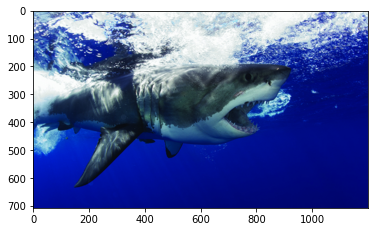

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

image = plt.imread('shark.jpg')
plt.imshow(image);

In [2]:
# dimensiones de la imagen
# (height, width, RGB)
image.shape

(707, 1200, 3)

In [3]:
# clase del objeto de imagen
type(image)

numpy.ndarray

Extraer un pedazo de la imagen 2D slice entre las filas 101 a 103 y columnas 201 a 203.

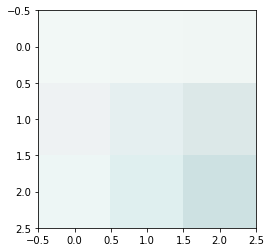

In [4]:
plt.imshow(image[101:104, 201:204]);

## Examen rápido

Cuando se añade ruido a las imágenes como operadores aritméticos nos tenemos que preocupar por:

- La velocidad de la operación de añadidura.
- **La magnitud del ruido comparado con el rango de la imagen.**
- En que se añade el ruido a la imagen o la imagen al ruido (el orden de la operación).
- Ninguna de las anteriores.

## Examen rápido

Las imágenes muestran valores de ruidos generados por diferentes valores de sigma.

$\sigma=2,8,32,64$

ADIVINE CUAL VALOR DE SIGMA LE CORRESPONDE A SU CORRESPONDIENTE IMAGEN CON EL RUIDO.

![](sigmas.png "Valores de sigma para los ruidos.")

## Actividad

Generar ruido gaussiano.

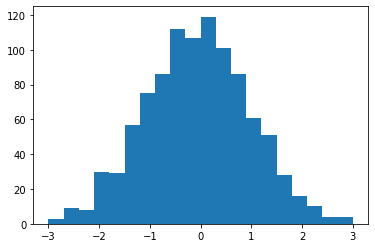

In [5]:
import numpy as np

noise = np.random.randn(1000)
plt.hist(noise, np.linspace(-3, 3, 21));

Trata de generar otros tipos de números aleatorios.

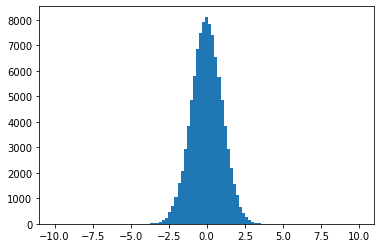

In [6]:
noise = np.random.randn(10**5)
plt.hist(noise, np.linspace(-10, 10, 100));

Prueba con un grid (malla) de 2 dimensiones 2D de valores aleatorios Gausianos.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


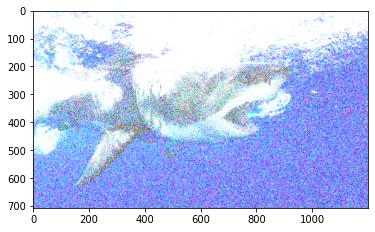

In [7]:
sigma = 64
gaussian_noise = np.random.normal(0, sigma, image.shape)
noisy_image = image + gaussian_noise
plt.imshow(noisy_image);

# Evidencia de aprendizaje
## Detección de bordes

La **detección de bordes** hace uso de métodos matemáticos para identificar puntos en una imagen digital en los que el brillo de la imagen cambia bruscamente o, más formalmente, tiene discontinuidades. Estos puntos se organizan típicamente en un conjunto de segmentos de líneas curvas denominados *bordes*.

### Algoritmos

#### Filtro de Sobel-Feldman

El **filtro de Sobel-Feldman** es un operador que usa dos núcleos (matrices) de $3\times3$ que están convolucionados con la imagen original para calcular aproximaciones de las derivadas: una para cambios horizontales y otra para verticales. Si definimos $A$ como la imagen original, y $G_x$ y $G_y$ son dos imágenes que en cada punto contienen las aproximaciones derivadas horizontal y vertical respectivamente, los cálculos son los siguientes:

\begin{equation}
    G_x =
    \begin{bmatrix}
        1 && 0 && -1 \\
        2 && 0 && -2 \\
        1 && 0 && -1
    \end{bmatrix}
    \cdot A
\end{equation}

\begin{equation}
    G_y =
    \begin{bmatrix}
        1 && 2 && 1 \\
        0 && 0 && 0 \\
        -1 && -2 && -1
    \end{bmatrix}
    \cdot A
\end{equation}

$G_x$ se define como creciente hacia la derecha, y $G_y$ hacia abajo. En cada punto de la imagen, las aproximaciones de gradiente resultantes se pueden combinar para dar la magnitud del gradiente:

$$
G = \sqrt{{G_x}^2 + {G_y}^2}
$$

También la dirección del gradiente:

$$
\theta = \arctan{\frac{G_y}{G_x}}
$$

La librería `opencv-python` incluye un método para detectar los bordes de una imagen usando el operador de Sobel-Feldman:

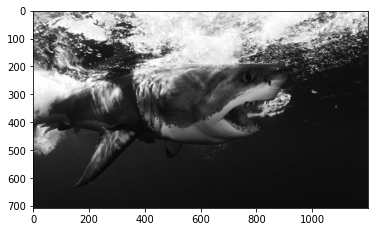

In [8]:
import cv2

# primero hay que convertir la imagen a escala de grises
grayimage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(grayimage, 'gray');

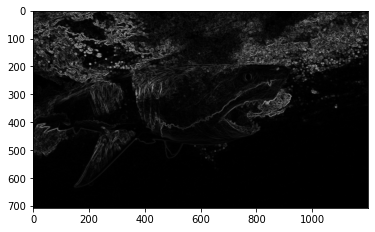

In [9]:
ddepth = cv2.CV_64F

# aplicar el gradiente sobre X
gx = cv2.Sobel(grayimage, ddepth, 1, 0, ksize=3)
# aplicar el gradiente sobre Y
gy = cv2.Sobel(grayimage, ddepth, 0, 1, ksize=3)

# calcular magnitud del gradiente
edges = cv2.sqrt(gx ** 2 + gy ** 2)

plt.imshow(edges, 'gray');